In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import *


In [ ]:
data = pd.read_csv('TCS.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

In [ ]:
period= 5

In [ ]:
# roc
data['roc'] = ((data['Close'] - data['Close'].shift(period)) / data['Close'].shift(period)) * 100


In [ ]:
# rsi
data['change_wrt_prevday'] = data['Close']- data['Close'].shift(1)

data['gain']=np.where(data['change_wrt_prevday'] >= 0,data['change_wrt_prevday'], 0)
data['loss']=np.where(data['change_wrt_prevday'] < 0,-data['change_wrt_prevday'], 0)

data['avg_gain'] = data['gain'].rolling(window=period).mean()
data['avg_loss'] = data['loss'].rolling(window=period).mean()

data['rsi'] = 100 - (100 / (1 + (data['avg_gain'] / data['avg_loss'])))

In [ ]:

# Bollinger bands

data['SMA'] = data['Close'].rolling(window=period).mean()
data['SD'] = data['Close'].rolling(window=period).std()

data['UB'] = data['SMA'] + 2* data['SD']
data['LB'] = data['SMA'] - 2* data['SD']
data['bb'] = data['UB']-data['LB']
# data['Signal'] = 0
# data.loc[data['Close'] <= data['LB'], 'Signal'] = 1
# data.loc[data['Close'] >= data['UB'], 'Signal'] = -1

In [ ]:
data = data.dropna(subset=['rsi'])

In [ ]:
data

,Date,Open,High,Low,Volume,Close,Adj Close,roc,change_wrt_prevday,gain,loss,avg_gain,avg_loss,rsi,SMA,SD,UB,LB,bb
4,2002-08-16,36.275002,38.000000,35.750000,811856,36.375000,25.520840,NaN,-0.087502,0.000000,0.087502,0.000000,0.665000,0.000000,37.632500,1.653372,40.939244,34.325757,6.613487
5,2002-08-19,36.674999,36.674999,35.137501,205880,35.474998,24.889397,-10.642323,-0.900002,0.000000,0.900002,0.000000,0.845000,0.000000,36.787500,1.391463,39.570427,34.004573,5.565854
6,2002-08-20,35.724998,38.724998,35.487499,3773624,36.462502,25.582241,-6.894343,0.987503,0.987503,0.000000,0.197501,0.737500,21.123046,36.247501,0.433501,37.114502,35.380499,1.734003
7,2002-08-21,38.474998,39.200001,36.525002,3011064,38.250000,26.836346,4.902292,1.787498,1.787498,0.000000,0.555000,0.197501,73.754104,36.605000,1.009510,38.624020,34.585981,4.038039
8,2002-08-22,39.512501,41.575001,39.312500,6732480,39.900002,27.994001,9.427494,1.650002,1.650002,0.000000,0.885001,0.197501,81.755160,37.292500,1.771291,40.835082,33.749918,7.085164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5445,2024-07-22,4299.950195,4319.950195,4265.000000,1896386,4287.350098,4287.350098,2.471346,-15.049805,0.000000,15.049805,29.269922,8.589941,77.311219,4250.590039,70.858660,4392.307359,4108.872719,283.434639
5446,2024-07-23,4283.000000,4361.700195,4266.299805,2365208,4302.350098,4302.350098,3.193656,15.000000,15.000000,0.000000,32.269922,5.639941,85.122760,4277.220020,56.108859,4389.437738,4165.002301,224.435438
5447,2024-07-24,4287.500000,4339.100098,4268.100098,1809793,4306.250000,4306.250000,3.058546,3.899902,3.899902,0.000000,31.199902,5.639941,84.690648,4302.779980,10.167595,4323.115171,4282.444790,40.670382
5448,2024-07-25,4295.000000,4343.000000,4274.200195,2810342,4322.500000,4322.500000,0.161050,16.250000,16.250000,0.000000,7.029980,5.639941,55.485587,4304.170020,12.546610,4329.263240,4279.076799,50.186441


In [ ]:
data = data.fillna(0)

In [ ]:
data=data.reset_index(drop=True)

In [ ]:
data

,Date,Open,High,Low,Volume,Close,Adj Close,roc,change_wrt_prevday,gain,loss,avg_gain,avg_loss,rsi,SMA,SD,UB,LB,bb
0,2002-08-16,36.275002,38.000000,35.750000,811856,36.375000,25.520840,0.000000,-0.087502,0.000000,0.087502,0.000000,0.665000,0.000000,37.632500,1.653372,40.939244,34.325757,6.613487
1,2002-08-19,36.674999,36.674999,35.137501,205880,35.474998,24.889397,-10.642323,-0.900002,0.000000,0.900002,0.000000,0.845000,0.000000,36.787500,1.391463,39.570427,34.004573,5.565854
2,2002-08-20,35.724998,38.724998,35.487499,3773624,36.462502,25.582241,-6.894343,0.987503,0.987503,0.000000,0.197501,0.737500,21.123046,36.247501,0.433501,37.114502,35.380499,1.734003
3,2002-08-21,38.474998,39.200001,36.525002,3011064,38.250000,26.836346,4.902292,1.787498,1.787498,0.000000,0.555000,0.197501,73.754104,36.605000,1.009510,38.624020,34.585981,4.038039
4,2002-08-22,39.512501,41.575001,39.312500,6732480,39.900002,27.994001,9.427494,1.650002,1.650002,0.000000,0.885001,0.197501,81.755160,37.292500,1.771291,40.835082,33.749918,7.085164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5159,2024-07-22,4299.950195,4319.950195,4265.000000,1896386,4287.350098,4287.350098,2.471346,-15.049805,0.000000,15.049805,29.269922,8.589941,77.311219,4250.590039,70.858660,4392.307359,4108.872719,283.434639
5160,2024-07-23,4283.000000,4361.700195,4266.299805,2365208,4302.350098,4302.350098,3.193656,15.000000,15.000000,0.000000,32.269922,5.639941,85.122760,4277.220020,56.108859,4389.437738,4165.002301,224.435438
5161,2024-07-24,4287.500000,4339.100098,4268.100098,1809793,4306.250000,4306.250000,3.058546,3.899902,3.899902,0.000000,31.199902,5.639941,84.690648,4302.779980,10.167595,4323.115171,4282.444790,40.670382
5162,2024-07-25,4295.000000,4343.000000,4274.200195,2810342,4322.500000,4322.500000,0.161050,16.250000,16.250000,0.000000,7.029980,5.639941,55.485587,4304.170020,12.546610,4329.263240,4279.076799,50.186441


In [ ]:
features = ['Open', 'High', 'Low', 'Volume', 'Adj Close', 'Close','roc','rsi','bb']
target = 'Close'

In [ ]:
sequence_length = 100

In [ ]:
X = []
y = []

for i in range(len(data) - sequence_length):
    X.append(data[features].iloc[i:i+sequence_length].values)
    y.append(data[target].iloc[i+sequence_length])

In [ ]:
X = np.array(X)
y = np.array(y).reshape(-1, 1)

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X.reshape(-1, X.shape[2])).reshape(X.shape)
y_scaled = scaler_y.fit_transform(y)

In [ ]:
s = 0.9
X_train = X_scaled[:int(s*len(X))]
X_test = X_scaled[int(s*len(X)):]
y_train = y_scaled[:int(s*len(y))]
y_test = y_scaled[int(s*len(y)):]


In [ ]:
  # model = Sequential()
# # model.add(InputLayer((100,6)))
# model.add(LSTM(128,activation='relu'))
# model.add(LSTM(128,activation='relu'))
# model.add(Dense(8,'relu'))
# model.add(Dense(1,'linear'))

model=Sequential()
model.add(LSTM(128,return_sequences=False,input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(20))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history=model.fit(X_train,y_train, batch_size = 128,epochs = 200,validation_split=0.2, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.1529 - val_loss: 0.1469
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0086 - val_loss: 0.0902
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0065 - val_loss: 0.0625
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0054 - val_loss: 0.0720
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0044 - val_loss: 0.0707
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - val_loss: 0.0549
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0036 - val_loss: 0.0418
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0031 - val_loss: 0.0376
Epoch 9/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0026 - val_loss: 0.0293
Epoch 10/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024 - val_loss: 0.0256
Epoch 11/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0025 - val_loss: 0.0307
Epoch 12/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

In [ ]:
y_test_pred_scaled = model.predict(X_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_scaled)

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


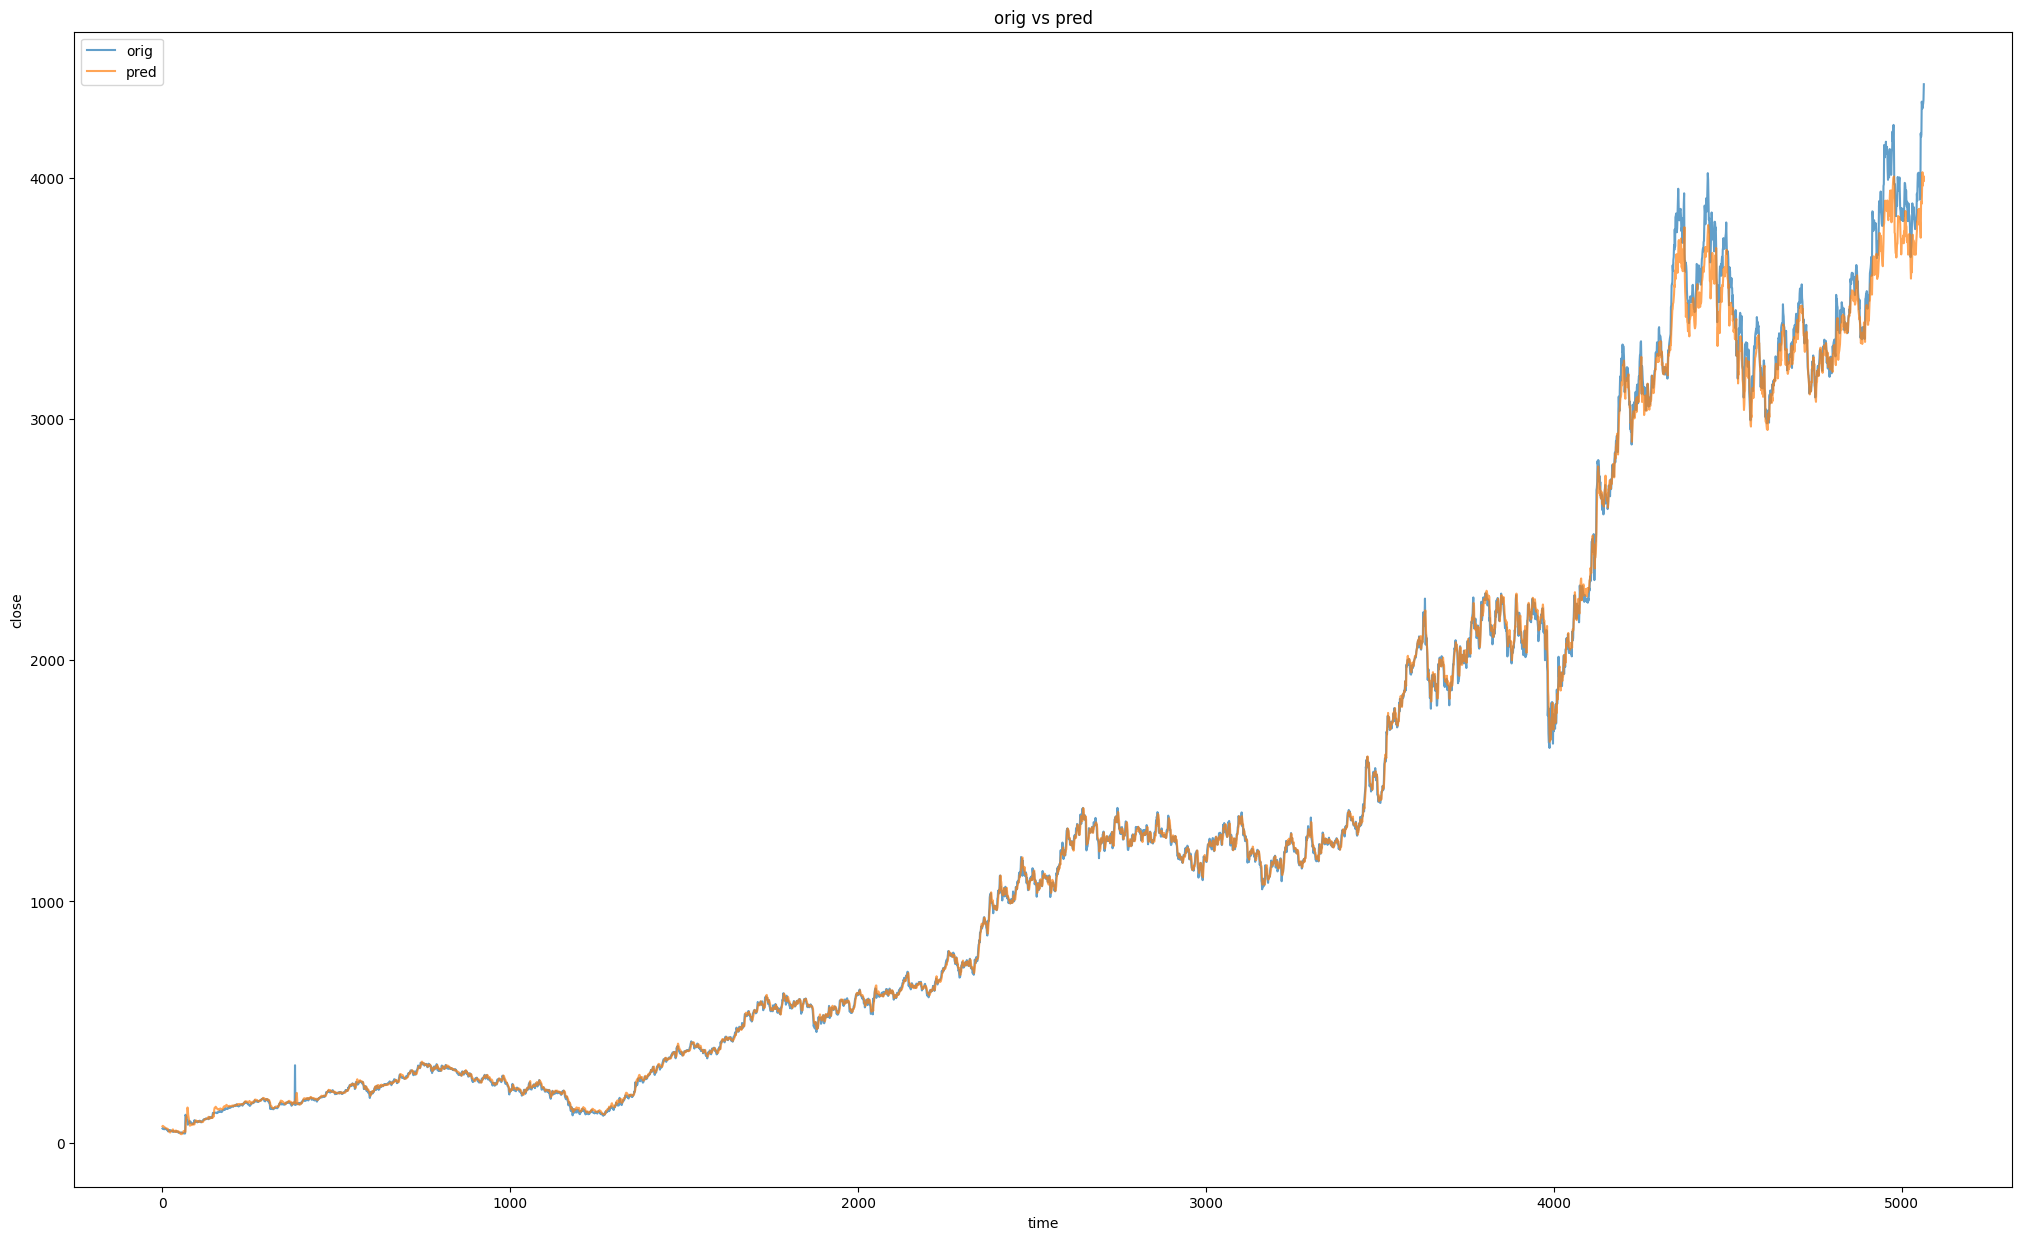

In [ ]:
plt.figure(figsize=(25, 15))
plt.plot(y_test_actual, label='orig', alpha=0.7)
plt.plot(y_test_pred, label='pred', alpha=0.7)
plt.title('orig vs pred')
plt.xlabel('time')
plt.ylabel('close')
plt.legend()
plt.show()

In [ ]:
y_test_pred_scaled = model.predict(X_test)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


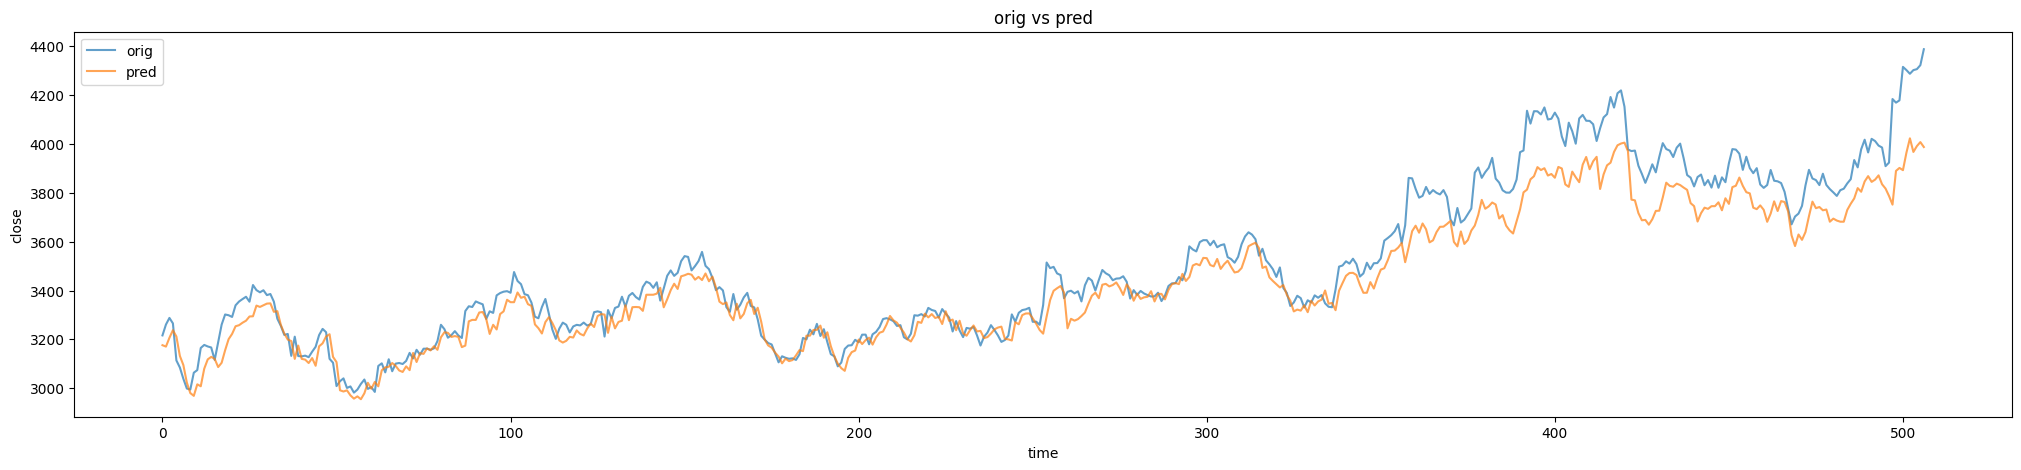

In [ ]:
plt.figure(figsize=(25, 5))
plt.plot(y_test_actual, label='orig', alpha=0.7)
plt.plot(y_test_pred, label='pred', alpha=0.7)
plt.title('orig vs pred')
plt.xlabel('time')
plt.ylabel('close')
plt.legend()
plt.show()